In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd


# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
# Access the .csv file in Google Drive folder. The file path must be correct
data = pd.read_csv('Titanic_Dataset.csv')

In [5]:
# View data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [6]:
# Confirm that data types are appropriate for data in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Check for missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Impute missing values
data["Age"]=data["Age"].fillna(value = data.groupby(["Pclass","Sex","Embarked"])["Age"].transform("mean"))
data['Cabin'] = data.groupby(["Pclass","Sex"])['Cabin'].transform(lambda x: x.fillna(x.mode().iloc[0]))
data['Embarked'] = data.groupby(["Pclass","Sex"])['Embarked'].transform(lambda x: x.fillna(x.mode().iloc[0]))
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

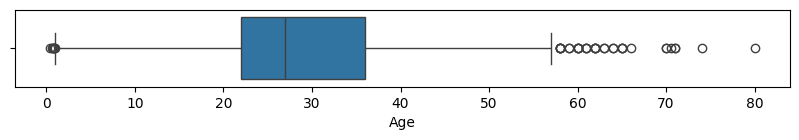

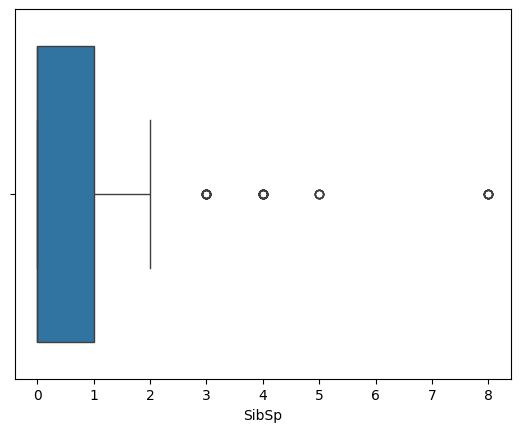

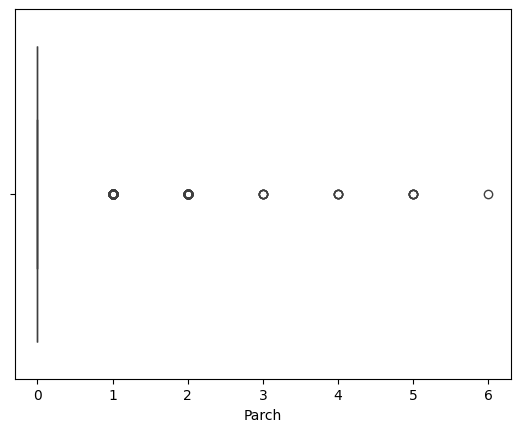

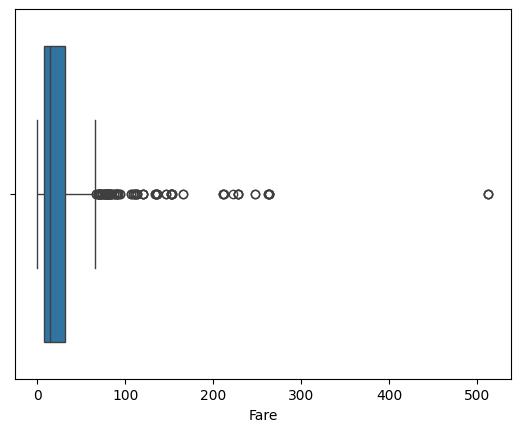

In [14]:
plt.figure(figsize=(10,1))
for col in ["Age","SibSp","Parch","Fare"]:
    sns.boxplot(data=data, x = col)
    plt.show()

In [15]:
data[data["Fare"]>100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000,3,2,19950,263.000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,36.053,1,0,PC 17569,146.521,B78,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000,3,2,19950,263.000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000,0,1,PC 17558,247.521,B58 B60,C
195,196,1,1,"Lurette, Miss. Elise",female,58.000,0,0,PC 17569,146.521,B80,C
215,216,1,1,"Newell, Miss. Madeleine",female,31.000,1,0,35273,113.275,D36,C
258,259,1,1,"Ward, Miss. Anna",female,35.000,0,0,PC 17755,512.329,B18,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.000,0,1,PC 17582,153.463,C125,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.000,0,0,PC 17760,135.633,C99,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.000,1,2,113781,151.550,C22 C26,S


# **BE SURE TO COMPLETE ALL OF YOUR DATA CLEANING, ANALYTICS AND DATA VISUALIZATIONS BEFORE INSTALLING THE PYCARET LIBRARY**

Installing Pycaret will unistall many of the Pandas methods.

To install Pycaret type "pip install pycaret[full]" into the terminal. It will take a few minutes to install.